### Logistics Regression

Step 1: import python Libraries
-   အခုတစ်ခါမှာတော့ ကျွန်တော်တို့က Regression (ကိန်းဂဏန်းခန့်မှန်းခြင်း) ကနေ Classification (အမျိုးအစားခွဲခြားခြင်း) ဘက်ကို ကူးပြောင်းလေ့လာတော့မှာ ဖြစ်ပါတယ်။ ဒီနေရာမှာ အဓိကသုံးမယ့် Algorithm ကတော့ Logistic Regression ဖြစ်ပါတယ်။

In [1]:
import pandas as pd       

Step 2: (Importing the Dataset)
-   အခု ကျွန်တော်တို့ အသုံးပြုမယ့် Dataset ကတော့ Social Network Ads ဖြစ်ပါတယ်။ ဒါက လူတစ်ယောက်ရဲ့ အသက် (Age) နဲ့ ခန့်မှန်းလစာ (Estimated Salary) ပေါ်မူတည်ပြီး သူဟာ ကြော်ငြာထားတဲ့ ပစ္စည်း (ဥပမာ- ကား) ကို ဝယ်ယူခြင်း ရှိ/မရှိ (Purchased: 0 သို့မဟုတ် 1) ကို ခွဲခြားပေးမယ့် Classification ပုစ္ဆာ ဖြစ်ပါတယ်။

In [17]:
# IMPORTING THE DATASET
social_N_data = pd.read_csv(r'C:\Users\pc\Desktop\GroupB Project\AI_2026\Day06 Liner and logistic Regression, Perceptron, train and test\groupB\nlh_Medical_Cost\nlh_logistic_regression.ipynb\data.csv')
display(social_N_data.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


####   # --- Method 1: Sigmoid Curve (Age တစ်ခုတည်းကို သုံးမယ်) ---

Step 3: Features ခွဲထုတ်ခြင်းနှင့် Train-Test Split (Preparing for Sigmoid)
-   Classification လုပ်တဲ့အခါမှာ Logistic Regression ရဲ့ သဘောတရားကို အလွယ်ကူဆုံးမြင်နိုင်ဖို့အတွက် ပထမဆုံးအနေနဲ့ "အသက် (Age)" တစ်ခုတည်းကိုပဲ Feature အဖြစ် သုံးပြီး စမ်းသပ်ကြည့်မှာ ဖြစ်ပါတယ်။

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Target (classification)
y = social_N_data['diagnosis'].values

# Encode M/B -> 1/0
le = LabelEncoder()
y = le.fit_transform(y)

# Feature (1D example)
X1 = social_N_data[['texture_mean']].values

# Train-test split
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y, test_size=0.25, random_state=0
)

# Train model
model_1d = LogisticRegression()
model_1d.fit(X1_train, y1_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Step 4: Logistic Regression Model ကို training ‌ပေးခြင်း
-   ယခုအဆင့်မှာတော့ Features ထဲက "အသက် (Age)" တစ်ခုတည်းကို အသုံးပြုပြီး Logistic Regression Model ကို စတင် train လိုက်ပြီ ဖြစ်ပါတယ်။ ဒီ Model ကနေတစ်ဆင့် အသက်အရွယ်အလိုက် ဝယ်ယူနိုင်ခြေ (Probability) ကို တွက်ချက်ပေးမယ့် Sigmoid Function ပုံသေနည်းကို ရှာဖွေသွားမှာပါ။

In [20]:
from sklearn.linear_model import LogisticRegression   

model_1d = LogisticRegression()

model_1d.fit(X1_train, y1_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Step 5: Model ၏ တိကျမှုကို စစ်ဆေးခြင်း (Accuracy Assessment)
-   ယခုအဆင့်တွင် Model မမြင်ဖူးသေးသော ဒေတာအသစ်များ (X1_test) ကို ပေး၍ ခန့်မှန်းခိုင်းပြီး၊ တကယ့်အဖြေမှန် (y1_test) နှင့် တိုက်စစ်ကာ တိကျမှု (Accuracy) မည်မျှရှိသည်ကို တိုင်းတာခြင်းဖြစ်ပါသည်။

In [21]:
from sklearn.metrics import accuracy_score             

# Model မမြင်ဖူးသေးသော Test Data များအပေါ် မူတည်၍ ခန့်မှန်းခြင်း
y1_pred = model_1d.predict(X1_test)

# ခန့်မှန်းချက်များနှင့် အဖြေမှန်များကို နှိုင်းယှဉ်၍ Accuracy တွက်ခြင်း
acc_1d = accuracy_score(y1_test, y1_pred)

print(f"Accuracy with Age only: {acc_1d :.2f}")

Accuracy with Age only: 0.73


Step 6: Sigmoid Curve ကို ပုံဖော်ခြင်း (Visualizing the Probability)
-   Logistic Regression ရဲ့ ထူးခြားချက်ကတော့ Linear Regression လို မျဉ်းဖြောင့်ကြီး မဟုတ်ဘဲ "S" ပုံသဏ္ဍာန် Sigmoid Curve ထွက်လာတာ ဖြစ်ပါတယ်။ ဒီ Curve က အသက် (Age) အလိုက် ဝယ်ယူနိုင်ခြေ (Probability) ဘယ်လောက်ရှိလဲဆိုတာကို ၀ နဲ့ ၁ ကြားမှာ ပြသပေးပါတယ်။

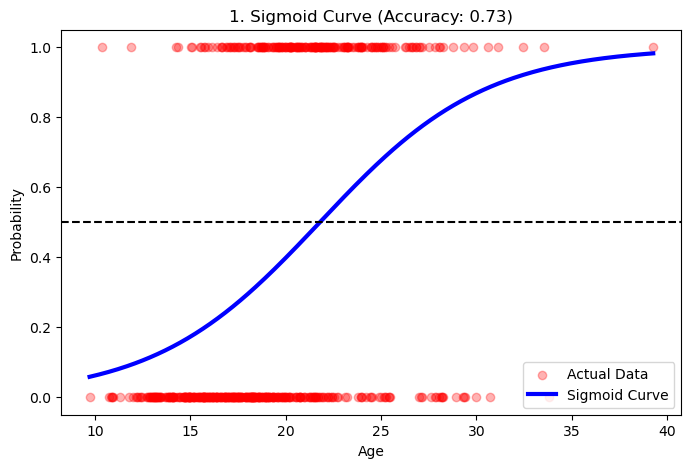

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid Curve Plot
plt.figure(figsize=(8, 5))

# အသက်အနည်းဆုံးမှ အများဆုံးအထိ အမှတ် ၃၀၀ ကို ဖန်တီးခြင်း 
X_range = np.linspace(X1.min(), X1.max(), 300).reshape(-1, 1)

# predict_proba ကို သုံးပြီး ဝယ်ယူနိုင်ခြေ (Class 1 ဖြစ်နိုင်ခြေ) ကို တွက်ချက်ခြင်း
probs = model_1d.predict_proba(X_range)[:, 1]

# မူလဒေတာများကို အစက်ချခြင်း (၀ နှင့် ၁ နေရာများတွင်သာ ရှိမည်)
plt.scatter(X1, y, color='red', alpha=0.3, label='Actual Data')

# Sigmoid Curve ဆွဲခြင်း
plt.plot(X_range, probs, color='blue', linewidth=3, label='Sigmoid Curve')

# Threshold line (0.5) ကို ဆွဲခြင်း - ဤမျဉ်းအထက်ရောက်လျှင် ဝယ်မည်ဟု Model က ဆုံးဖြတ်သည်
plt.axhline(y=0.5, color='black', linestyle='--')

plt.title(f'1. Sigmoid Curve (Accuracy: {acc_1d:.2f})')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.legend()
plt.show()